# Thompson Sampling

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [6]:
import random
# Initialize parameters
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0]*d
numbers_of_rewards_0 = [0]*d
total_reward = 0

# Step 1.
for n in range(0, N):
    ad = 0
    max_random = 0

    # Within the 10 adds, we follow the beta selection and random a number for each ad
    # We compare the 10 ends and return the one with highest number
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad]+=1
    else:
        numbers_of_rewards_0[ad]+=1
    total_reward += reward


## Visualising the results - Histogram

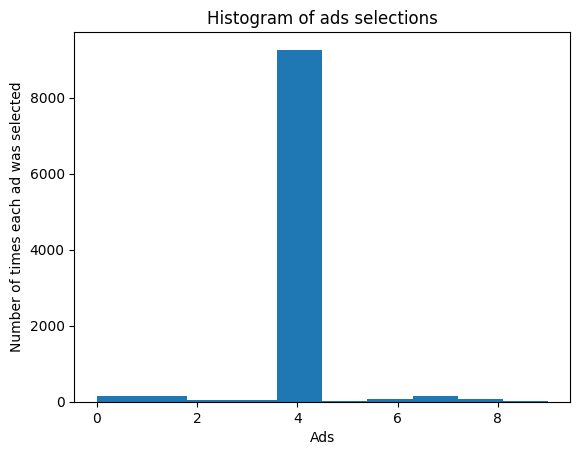

In [7]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()